# Contenedores para basura en la Ciudad de México
 Proyecto Prototípico

---
Licenciatura Ciencias de Datos para Negocios - 6to semestre


---




En este proyecto, abordaremos el desafío de la mala gestión de residuos en la Ciudad de México utilizando técnicas de programación. Basándonos en la información proporcionada por el Instituto Nacional de Estadística y Geografía (INEGI), estamos desarrollando un código que nos permitirá analizar y visualizar datos relacionados con la generación y gestión de residuos.

A través de este código, buscamos identificar patrones, tendencias y anomalías en los datos, lo que nos ayudará a comprender mejor la situación actual y tomar decisiones informadas para mejorar la gestión de residuos en nuestra comunidad.


In [208]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [209]:
#IMPORTAR PAQUETES NECESARIOS
import pandas as pd
import requests
import geopandas as gpd
import json
import numpy as np
from scipy.optimize import linprog

import matplotlib.pyplot as plt
from matplotlib import rcParams

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch



## Cartografía para los mapas 

In [210]:
# Leer el archivo GeoJSON
estados = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")

# Renombrar Distrito Federal como Ciudad de México
estados['state_name'] = estados['state_name'].replace({'Distrito Federal': 'Ciudad de México'})
estados

,id,state_code,state_name,geometry
0,None,9,Ciudad de México,"POLYGON ((-99.09052 19.50926, -99.06421 19.498..."
1,None,12,Guerrero,"POLYGON ((-100.53878 18.84399, -100.50201 18.8..."
2,None,15,México,"POLYGON ((-99.85919 20.26838, -99.85950 20.264..."
3,None,17,Morelos,"POLYGON ((-99.06199 19.04877, -99.02935 19.085..."
4,None,25,Sinaloa,"POLYGON ((-108.47046 27.03457, -108.42165 27.0..."
5,None,2,Baja California,"MULTIPOLYGON (((-115.21380 28.37512, -115.1675..."
6,None,26,Sonora,"MULTIPOLYGON (((-112.55438 28.73103, -112.5553..."
7,None,3,Baja California Sur,"MULTIPOLYGON (((-109.80049 24.15197, -109.8020..."
8,None,32,Zacatecas,"POLYGON ((-101.60033 24.75414, -101.59780 24.7..."
9,None,10,Durango,"POLYGON ((-105.93181 26.76559, -105.89409 26.7..."


In [211]:
# Leer el archivo GeoJSON CDMX
cdmx = gpd.read_file("https://raw.githubusercontent.com/JuveCampos/Shapes_Resiliencia_CDMX_CIDE/master/Shape%20Ciudad%20de%20M%C3%A9xico/CDMX_mpal.geojson")
cdmx

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry
0,09,002,Azcapotzalco,337,337,338,"POLYGON ((-99.18245 19.50756, -99.18231 19.507..."
1,09,005,Gustavo A. Madero,338,338,339,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
2,09,016,Miguel Hidalgo,339,339,340,"POLYGON ((-99.19044 19.47046, -99.19058 19.467..."
3,09,006,Iztacalco,340,340,341,"POLYGON ((-99.05579 19.42214, -99.05584 19.421..."
4,09,017,Venustiano Carranza,341,341,342,"POLYGON ((-99.10946 19.45292, -99.10895 19.452..."
5,09,007,Iztapalapa,342,342,343,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
6,09,012,Tlalpan,2448,2448,2449,"POLYGON ((-99.19671 19.30240, -99.19629 19.302..."
7,09,013,Xochimilco,2449,2449,2450,"POLYGON ((-99.09880 19.32045, -99.09870 19.319..."
8,09,008,La Magdalena Contreras,2450,2450,2451,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
9,09,014,Benito Juárez,2451,2451,2452,"POLYGON ((-99.13659 19.40281, -99.13679 19.401..."


In [212]:
# Leer el archivo JSON CDMX
cdmx1 = gpd.read_file("https://datos.cdmx.gob.mx/dataset/d2ccf6ae-fdf4-407c-a15f-e7dfac2d509d/resource/7b0b7a89-d92e-46ec-9286-018e849f8123/download/lmites-de-ageb-urbanas-en-la-ciudad-de-mxico.geojson")
cdmx1

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901000011716,09,010,0001,1716,"POLYGON ((-99.25882 19.32558, -99.25834 19.325..."
1,0901000012150,09,010,0001,2150,"POLYGON ((-99.19170 19.37893, -99.19170 19.378..."
2,0901000011133,09,010,0001,1133,"POLYGON ((-99.17760 19.35182, -99.17766 19.351..."
3,0901000011307,09,010,0001,1307,"POLYGON ((-99.20805 19.31277, -99.20768 19.312..."
4,0901000010281,09,010,0001,0281,"POLYGON ((-99.24228 19.38451, -99.24233 19.384..."
...,...,...,...,...,...,...
2426,0900700012564,09,007,0001,2564,"POLYGON ((-99.00253 19.35744, -99.00255 19.355..."
2427,0900700012615,09,007,0001,2615,"POLYGON ((-98.99932 19.35467, -98.99889 19.354..."
2428,0900700012969,09,007,0001,2969,"POLYGON ((-98.98392 19.34561, -98.98367 19.345..."
2429,0900700013721,09,007,0001,3721,"POLYGON ((-99.06016 19.36342, -99.06042 19.362..."


In [213]:
print("Ver claves de los municipios",cdmx["CVE_MUN"].unique()) 

Ver claves de los municipios ['002' '005' '016' '006' '017' '007' '012' '013' '008' '014' '015' '010'
 '004' '003' '011' '009']


In [214]:
cdmx1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CVEGEO    2431 non-null   object  
 1   CVE_ENT   2431 non-null   object  
 2   CVE_MUN   2431 non-null   object  
 3   CVE_LOC   2431 non-null   object  
 4   CVE_AGEB  2431 non-null   object  
 5   geometry  2431 non-null   geometry
dtypes: geometry(1), object(5)
memory usage: 114.1+ KB


### **1) INVESTIGACIÓN DE OPERACIONES** 
Modelo de Optimización de Recursos

In [215]:
# Ruta archivos CSV
personal = 'https://raw.githubusercontent.com/Quetzaltlali/PP_LCDN-Residuos_CDMX/main/tipo_contrato.csv'
personal = pd.read_csv(personal)
personal

,Clave Entidad,Entidad federativa,Clave Municipio,Municipio,Total,Confianza,Base o sindicalizado,Eventual,Otros
0,9,Ciudad de México,2,Azcapotzalco,412,3,229,0,180
1,9,Ciudad de México,3,Coyoacán,2164,1,1343,820,0
2,9,Ciudad de México,4,Cuajimalpa de Morelos,486,4,306,176,0
3,9,Ciudad de México,5,Gustavo A. Madero,2943,2,1686,1255,0
4,9,Ciudad de México,6,Iztacalco,990,1,573,0,416
5,9,Ciudad de México,7,Iztapalapa,4035,3,2185,65,1782
6,9,Ciudad de México,8,La Magdalena Contreras,550,3,330,0,217
7,9,Ciudad de México,9,Milpa Alta,418,1,289,128,0
8,9,Ciudad de México,10,Álvaro Obregón,950,4,561,385,0
9,9,Ciudad de México,11,Tláhuac,653,1,358,0,294


In [216]:
# Verificar la estructura del DataFrame
print(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Clave Entidad         16 non-null     int64 
 1   Entidad federativa    16 non-null     object
 2   Clave Municipio       16 non-null     int64 
 3   Municipio             16 non-null     object
 4   Total                 16 non-null     int64 
 5   Confianza             16 non-null     int64 
 6   Base o sindicalizado  16 non-null     int64 
 7   Eventual              16 non-null     int64 
 8   Otros                 16 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.3+ KB
None


In [217]:
# Número de municipios
n_municipios = len(personal)
n_municipios

16

"""
### Función Objetivo
La función objetivo busca minimizar la suma de empleados de confianza, eventuales y otros en todos los municipios. 
En términos matemáticos, esto se expresa como:

 Minimizar Z = Suma total ∑{i=1}^{n} (x_i + y_i + z_i) 

donde:
- \( x_i \): empleados de confianza en el municipio \( x1 \)
- \( y_i \): empleados eventuales en el municipio \( y1\)
- \( z_i \): otros empleados en el municipio \( z1 \)
- \( n \): es el número total de municipios \( n \)

"""

In [218]:
# Función objetivo: 
# inimizar la suma de empleados de confianza, eventuales y otros
# Creamos un vector c de ceros con tamaño igual al número de municipios * 3 (para los tres tipos de empleados)
c = np.zeros(n_municipios * 3)
for i in range(n_municipios):
    c[i * 3] = 1  # Empleados de confianza
    c[i * 3 + 1] = 1  # Empleados eventuales
    c[i * 3 + 2] = 1  # Otros empleados

"""
### Restricciones de Igualdad
Las restricciones de igualdad aseguran que la suma de empleados de confianza, eventuales y otros en cada municipio 
sea igual a la cantidad total de empleados menos los empleados de base:

( x_i + y_i + z_i ) = Total_i - Base_i 

En el código, se construyen las matrices ( A_eq ) y ( b_eq) 

"""

In [219]:
# Restricciones de igualdad: mantener los empleados de base constantes
A_eq = []
b_eq = []
for i in range(n_municipios):
    # Creamos una fila de ceros para A_eq
    eq = np.zeros(n_municipios * 3)
    eq[i * 3 + 0] = 1  # Empleados de confianza
    eq[i * 3 + 1] = 1  # Empleados eventuales
    eq[i * 3 + 2] = 1  # Otros empleados
    A_eq.append(eq)
    # La cantidad total de empleados menos los empleados de base debe ser igual a la suma de los otros tipos de empleados
    b_eq.append(personal.at[i, 'Total'] - personal.at[i, 'Base o sindicalizado'])


"""
### Restricciones de Desigualdad
Las restricciones de desigualdad aseguran que la suma de empleados de confianza, eventuales y otros en cada municipio
sea al menos igual a un mínimo operativo, ajustado por los empleados de base:

( x_i + y_i + z_i ) ≥ min_operacion - Base_i

En el código, se construyen las matrices ( A_ub ) y ( b_ub ).

"""


In [220]:
# Restricciones de desigualdad: garantizar el mínimo de empleados necesarios
A_ub = []
b_ub = []
min_operacion = 200  # Suponiendo que el mínimo necesario es 200 empleados
for i in range(n_municipios):
    # Creamos una fila de ceros para A_ub
    ub = np.zeros(n_municipios * 3)
    ub[i * 3 + 0] = 1  # Empleados de confianza
    ub[i * 3 + 1] = 1  # Empleados eventuales
    ub[i * 3 + 2] = 1  # Otros empleados
    A_ub.append(-ub)  # Negamos para usar en la restricción de desigualdad <=
    b_ub.append(-(min_operacion - personal.at[i, 'Base o sindicalizado']))


"""
### Los datos deben estar en formato adecuado para su procesamiento.
Las matrices A_eq y A_ub, y los vectores b_eq y b_ub deben ser convertidos a matrices numpy antes de pasarlos a la función linprog.

"""

In [221]:
# Convertir las listas a matrices numpy
A_eq = np.array(A_eq)
b_eq = np.array(b_eq)
A_ub = np.array(A_ub)
b_ub = np.array(b_ub)

# Resolver el problema de programación lineal
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='simplex')


C:\Users\quetz\AppData\Local\Temp\ipykernel_1180\2200261294.py:8: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='simplex')


"""
### Impresión de Resultados
Finalmente, se imprimen los resultados encontrados con una solución óptima:

Se muestra cada tipo de empleado para cada municipio según la solución encontrada por el algoritmo de programación lineal.
"""

In [222]:
# Verificar y mostrar los resultados
if res.success:
    print("Solución encontrada:")
    for i in range(n_municipios):
        print(f"Municipio: {personal.at[i, 'Municipio']}")
        print(f"  Empleados de confianza: {res.x[i * 3]:.0f}")
        print(f"  Empleados eventuales: {res.x[i * 3 + 1]:.0f}")
        print(f"  Otros empleados: {res.x[i * 3 + 2]:.0f}")
else:
    print("No se encontró una solución óptima")

Solución encontrada:
Municipio: Azcapotzalco
  Empleados de confianza: 183
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Coyoacán
  Empleados de confianza: 821
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Cuajimalpa de Morelos
  Empleados de confianza: 180
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Gustavo A. Madero
  Empleados de confianza: 1257
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Iztacalco
  Empleados de confianza: 417
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Iztapalapa
  Empleados de confianza: 1850
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: La Magdalena Contreras
  Empleados de confianza: 220
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Milpa Alta
  Empleados de confianza: 129
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Álvaro Obregón
  Empleados de confianza: 389
  Empleados eventuales: 0
  Otros empleados: 0
Municipio: Tláhuac
  Empleados de confianza: 295
  Em

### Conclusión de la Optimización de Empleados por Municipio

La optimización se realizó con el objetivo de minimizar la cantidad total de empleados en los municipios del sector de residuos sólidos, respetando las siguientes consideraciones:

- **Restricciones:**
  - Se mantuvieron constantes los empleados de base o sindicalizados, no pudiendo ser reducidos.
  - Se estableció un límite mínimo de operación de 200 empleados en total por municipio, contabilizando empleados de confianza, eventuales y otros.

- **Función Objetivo:**
  - Minimizar la suma de empleados de confianza, eventuales y otros empleados, reflejando una optimización en la gestión de recursos humanos y posiblemente una reducción en costos operativos.

Los resultados obtenidos muestran una asignación eficiente de empleados, donde cada municipio tiene asignados únicamente empleados de confianza, cumpliendo con las restricciones impuestas. Esto sugiere que el modelo de optimización aplicado fue efectivo para alcanzar el objetivo planteado, asegurando una gestión eficiente de recursos humanos en el sector de residuos sólidos de los municipios analizados.


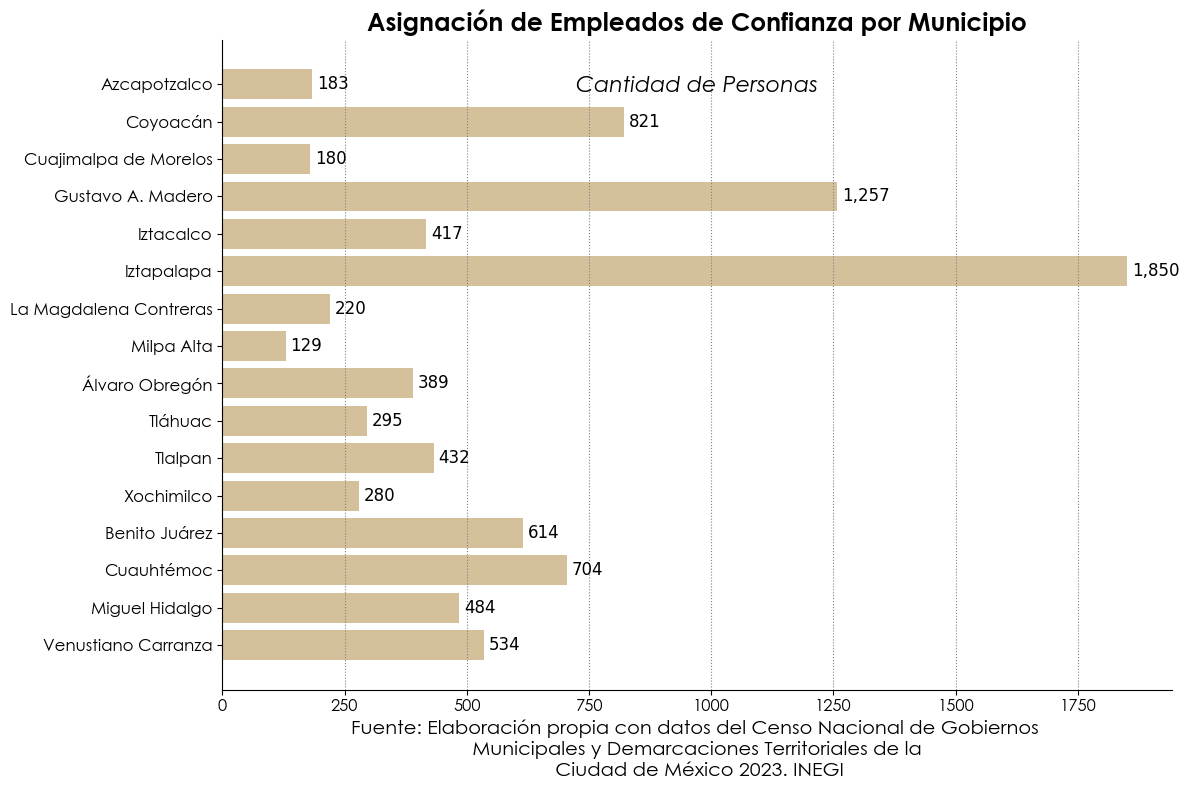

In [223]:
# Datos de ejemplo (empleados de confianza por municipio)
municipios = ['Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos', 'Gustavo A. Madero', 
              'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta',
              'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez',
              'Cuauhtémoc', 'Miguel Hidalgo', 'Venustiano Carranza']
empleados_confianza = [183, 821, 180, 1257, 417, 1850, 220, 129, 389, 295, 432, 280, 614, 704, 484, 534]

# Configurar la fuente y otros parámetros estéticos
plt.figure(figsize=(12, 8))
bars = plt.barh(municipios, empleados_confianza, color='#d4c19c')  # Color de las barras verde

# Añadir las etiquetas con los valores en cada barra
for bar, emp_conf in zip(bars, empleados_confianza):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{emp_conf:,}', 
             va='center', ha='left', fontsize=12)

plt.xlabel('Fuente: Elaboración propia con datos del Censo Nacional de Gobiernos \n Municipales y Demarcaciones Territoriales de la \n Ciudad de México 2023. INEGI', fontsize=14, fontname='Century Gothic')  # Fuente de la etiqueta del eje x
plt.title('Asignación de Empleados de Confianza por Municipio', fontsize=18, fontweight='bold', fontname='Century Gothic')  # Título con negrita y fuente Century Gothic

# Subtítulo debajo del título principal
plt.text(0.5, 0.92, 'Cantidad de Personas', fontsize=16, color='black', style='italic',
         transform=plt.gca().transAxes, ha='center', fontname='Century Gothic')  # Ajuste de la posición vertical

plt.gca().invert_yaxis()  # Invertir el eje y para que el municipio con más empleados esté arriba
plt.grid(axis='x', color='gray', linestyle=':')  # Líneas de la cuadrícula en gris y punteadas en el eje x

# Eliminar bordes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12, fontname='Century Gothic')  # Fuente de los ticks del eje x
plt.yticks(fontsize=12, fontname='Century Gothic')  # Fuente de los ticks del eje y

# Guardar el gráfico como imagen PNG
plt.tight_layout()  # Ajustar automáticamente los márgenes para evitar recorte de etiquetas
plt.savefig('grafico_mejorado.png', bbox_inches='tight', dpi=300)  # Guardar el gráfico como imagen
plt.show()


In [224]:
# Datos originales (empleados de confianza por municipio)
municipios = ['Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos', 'Gustavo A. Madero', 
              'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta',
              'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez',
              'Cuauhtémoc', 'Miguel Hidalgo', 'Venustiano Carranza']
empleados_confianza = [183, 821, 180, 1257, 417, 1850, 220, 129, 389, 295, 432, 280, 614, 704, 484, 534]

# Leer el archivo GeoJSON de los municipios de la Ciudad de México
url_geojson = "https://raw.githubusercontent.com/JuveCampos/Shapes_Resiliencia_CDMX_CIDE/master/Shape%20Ciudad%20de%20M%C3%A9xico/CDMX_mpal.geojson"
cdmx = gpd.read_file(url_geojson)

# Crear un diccionario con los datos originales
datos_originales = dict(zip(municipios, empleados_confianza))

# Agregar una nueva columna al GeoDataFrame
cdmx['Empleados de confianza'] = cdmx['NOM_MUN'].map(datos_originales)

# Definir los colores para cada rango
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff"]
niveles = ['< 220', '220 - 432', '432 - 614', '> 614']

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

<Figure size 1200x1000 with 0 Axes>

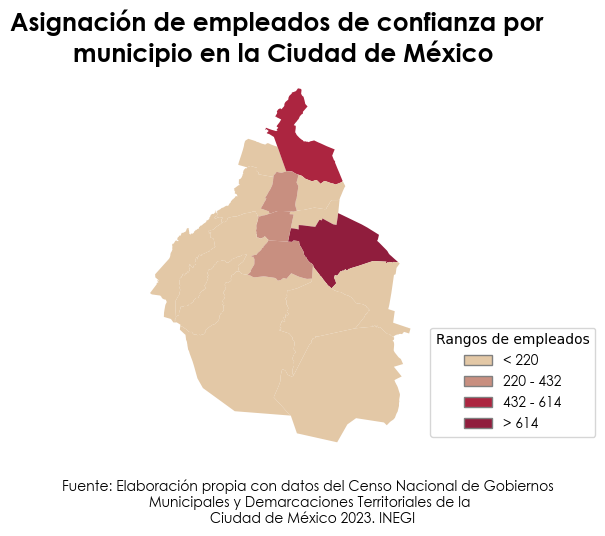

In [225]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el mapa temático de empleados de confianza por municipio
cdmx.plot(column='Empleados de confianza', cmap=cmap_paleta, linewidth=0.8, edgecolor='none', legend=False)

# Quitar marcos de latitud y longitud
plt.axis('off')

# Añadir título con la fuente 'Century Gothic'
plt.title('Asignación de empleados de confianza por \n municipio en la Ciudad de México', fontsize=18, fontweight='bold', fontname='Century Gothic')

# Crear leyenda personalizada y ubicarla a la derecha
legend_elements = [Patch(facecolor=color, edgecolor='gray', label=label) for color, label in zip(paleta, niveles)]
plt.legend(handles=legend_elements, title='Rangos de empleados', loc='center left', bbox_to_anchor=(1, 0.20), fontsize=10, prop={'family': 'Century Gothic'})

# Agregar fuente debajo del mapa con la fuente 'Century Gothic'
plt.figtext(0.5, -0.1, 'Fuente: Elaboración propia con datos del Censo Nacional de Gobiernos \n Municipales y Demarcaciones Territoriales de la \n Ciudad de México 2023. INEGI', fontsize=10, ha='center', fontname='Century Gothic')

# Ajustar automáticamente los márgenes para evitar recorte de etiquetas
plt.tight_layout()

# Guardar el gráfico como imagen PNG
plt.savefig('grafica_cdmx.png', bbox_inches='tight', dpi=300)

# Mostrar el mapa
plt.show()

### **2) VISUALIZACIÓN DE DATOS** 
Diseño de gráficos eficientes para describir la situación de contenedores de basura en tu comunidad.


In [226]:
# URL con token del la variación anual del igae
url1 = "  https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200032275/es/0700/false/BISE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_resid= requests.get(url1)

# Convertir la respuesta en JSON
data_resid = response_resid.json()

# Usar las columnas TIME_PERIOD y OBS_VALUE
data_resid = pd.DataFrame(data_resid["Series"][0]["OBSERVATIONS"])

#Convertir los tipos de datos de caracteres a fecha y numericas
data_resid['TIME_PERIOD'] = pd.to_datetime(data_resid['TIME_PERIOD'])
data_resid['OBS_VALUE'] = pd.to_numeric(data_resid['OBS_VALUE'])

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
data_resid = data_resid[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
# Porcentaje de la población de 18 años y más satisfecha con el servicio de recolección de basura Nacional
data_resid.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Porcentaje'}, inplace=True)
data_resid

,Fecha,Porcentaje
0,2013-01-01,67.328591
1,2015-01-01,60.969462
2,2017-01-01,65.034225
3,2019-01-01,66.399147
4,2021-01-01,70.495388
5,2023-01-01,72.645835


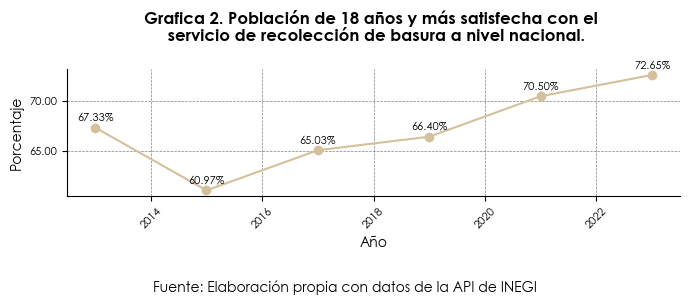

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Crear la gráfica
plt.figure(figsize=(7, 2.7))
plt.plot(data_resid['Fecha'], data_resid['Porcentaje'], marker='o', linestyle='-', color='#d4c19c')
plt.title('Grafica 2. Población de 18 años y más satisfecha con el \n servicio de recolección de basura a nivel nacional.', fontsize=12, fontweight='bold', fontname='Century Gothic', ha='center', pad=20)
plt.xlabel('Año', fontsize=10, fontname='Century Gothic', ha='center')
plt.ylabel('Porcentaje', fontsize=10, fontname='Century Gothic', ha='center')

# Agregar porcentajes a cada punto
for i, porcentaje in enumerate(data_resid['Porcentaje']):
    plt.annotate(f'{porcentaje:.2f}%', (data_resid['Fecha'][i], porcentaje), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, fontname='Century Gothic')

# Agregar fuente debajo del mapa con la fuente 'Century Gothic'
plt.figtext(0.5, -0.1, 'Fuente: Elaboración propia con datos de la API de INEGI', fontsize=10, ha='center', fontname='Century Gothic')

# Formatear los números en el eje Y con comas y dos decimales
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.2f}'))

# Configurar fuente y tamaño de fuente para los números en los ejes X y Y
plt.xticks(fontsize=8, fontname='Century Gothic')
plt.yticks(fontsize=8, fontname='Century Gothic')

# Quitar el marco de la parte superior y derecha
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir líneas de fondo de color gris
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Rotar las etiquetas del eje X y aplicar la misma fuente
plt.xticks(rotation=45)

plt.tight_layout()

# Guardar la imagen
plt.savefig('grafica_2.png', dpi=300, bbox_inches='tight')

plt.show()


In [228]:
# URL con token del la variación anual del igae
url2 = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207020194/es/0700/false/BISE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
# Hacer la solicitud HTTP a la URL
response_resid= requests.get(url2)

# Convertir la respuesta en JSON
data_resid = response_resid.json()

# Usar las columnas TIME_PERIOD y OBS_VALUE
data_resid = pd.DataFrame(data_resid["Series"][0]["OBSERVATIONS"])

#Convertir los tipos de datos de caracteres a fecha y numericas
data_resid['TIME_PERIOD'] = pd.to_datetime(data_resid['TIME_PERIOD'])
data_resid['OBS_VALUE'] = pd.to_numeric(data_resid['OBS_VALUE'])

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
data_resid = data_resid[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
# Porcentaje de la población de 18 años y más satisfecha con el servicio de recolección de basura
data_resid.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Cantidad de personas'}, inplace=True)

# Convertir la cantidad de personas a millones
data_resid['Cantidad de personas'] = data_resid['Cantidad de personas'] / 1000000

data_resid

,Fecha,Cantidad de personas
0,2013-01-01,29.641314
1,2015-01-01,28.051457
2,2017-01-01,31.060849
3,2019-01-01,33.307948
4,2021-01-01,36.165551
5,2023-01-01,38.152521


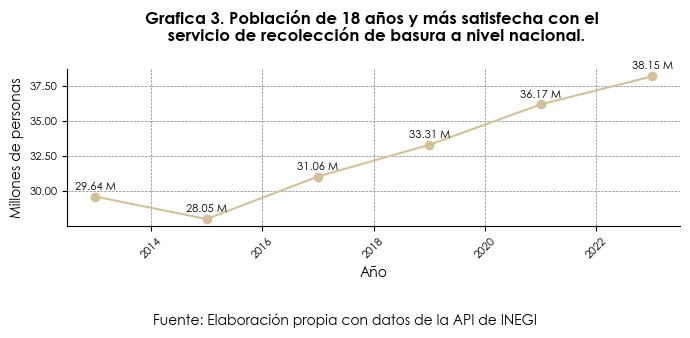

In [229]:

# Crear la gráfica
plt.figure(figsize=(7, 3))
plt.plot(data_resid['Fecha'], data_resid['Cantidad de personas'], marker='o', linestyle='-', color='#d4c19c')
plt.title('Grafica 3. Población de 18 años y más satisfecha con el \n servicio de recolección de basura a nivel nacional.', fontsize=12, fontweight='bold', fontname='Century Gothic', ha='center', pad=20)
plt.xlabel('Año', fontsize=10, fontname='Century Gothic', ha='center')
plt.ylabel('Millones de personas', fontsize=10, fontname='Century Gothic', ha='center')

# Agregar cantidad de personas en millones a cada punto
for i, cantidad in enumerate(data_resid['Cantidad de personas']):
    plt.annotate(f'{cantidad:.2f} M', (data_resid['Fecha'][i], cantidad), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, fontname='Century Gothic')

# Agregar fuente debajo del mapa con la fuente 'Century Gothic'
plt.figtext(0.5, -0.1, 'Fuente: Elaboración propia con datos de la API de INEGI', fontsize=10, ha='center', fontname='Century Gothic')

# Formatear los números en el eje Y con comas y dos decimales
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.2f}'))

# Configurar fuente y tamaño de fuente para los números en los ejes X y Y
plt.xticks(fontsize=8, fontname='Century Gothic')
plt.yticks(fontsize=8, fontname='Century Gothic')

# Quitar el marco de la parte superior y derecha
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir líneas de fondo de color gris
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Rotar las etiquetas del eje X y aplicar la misma fuente
plt.xticks(rotation=45)

plt.tight_layout()

# Guardar la imagen
plt.savefig('grafica_3.png', dpi=300)

plt.show()

In [230]:
# URL con token del la variación anual del igae
url3 = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200032275/es/07000009/false/BISE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
# Hacer la solicitud HTTP a la URL
response_resid= requests.get(url3)

# Convertir la respuesta en JSON
data_porcentaje = response_resid.json()

# Usar las columnas TIME_PERIOD y OBS_VALUE
data_porcentaje = pd.DataFrame(data_porcentaje["Series"][0]["OBSERVATIONS"])

#Convertir los tipos de datos de caracteres a fecha y numericas
data_porcentaje['TIME_PERIOD'] = pd.to_datetime(data_porcentaje['TIME_PERIOD'])
data_porcentaje['OBS_VALUE'] = pd.to_numeric(data_porcentaje['OBS_VALUE'])

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
data_porcentaje = data_porcentaje[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
# Porcentaje de la población de 18 años y más satisfecha con el servicio de recolección de basura Ciduad de México
data_porcentaje.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Porcentaje'}, inplace=True)
data_porcentaje

,Fecha,Porcentaje
0,2013-01-01,59.410699
1,2015-01-01,65.187023
2,2017-01-01,65.059493
3,2019-01-01,69.466055
4,2021-01-01,75.149520
5,2023-01-01,74.974844


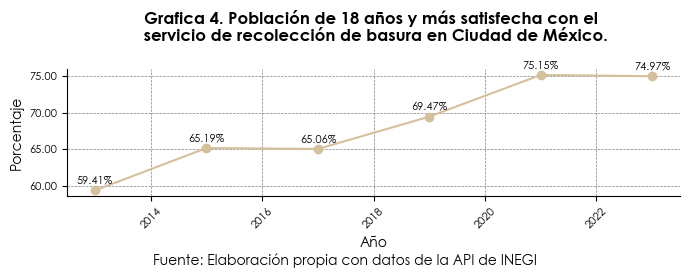

In [231]:
# Crear la gráfica
plt.figure(figsize=(7, 2.7))
plt.plot(data_porcentaje['Fecha'], data_porcentaje['Porcentaje'], marker='o', linestyle='-', color='#d4c19c')
plt.title('Grafica 4. Población de 18 años y más satisfecha con el \n servicio de recolección de basura en Ciudad de México.', fontsize=12, fontweight='bold', fontname='Century Gothic', ha='center', pad=20)
plt.xlabel('Año', fontsize=10, fontname='Century Gothic', ha='center')
plt.ylabel('Porcentaje', fontsize=10, fontname='Century Gothic', ha='center')

# Agregar porcentajes a cada punto
for i, porcentaje in enumerate(data_porcentaje['Porcentaje']):
    plt.annotate(f'{porcentaje:.2f}%', (data_porcentaje['Fecha'][i], porcentaje), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, fontname='Century Gothic')

# Agregar fuente debajo del mapa con la fuente 'Century Gothic'
plt.figtext(0.5, -0., 'Fuente: Elaboración propia con datos de la API de INEGI', fontsize=10, ha='center', fontname='Century Gothic')

# Formatear los números en el eje Y con comas y dos decimales
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.2f}'))

# Configurar fuente y tamaño de fuente para los números en los ejes X y Y
plt.xticks(fontsize=8, fontname='Century Gothic')
plt.yticks(fontsize=8, fontname='Century Gothic')

# Quitar el marco de la parte superior y derecha
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir líneas de fondo de color gris
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Rotar las etiquetas del eje X y aplicar la misma fuente
plt.xticks(rotation=45)

plt.tight_layout()

# Guardar la imagen
plt.savefig('grafica_4.png', dpi=300)

plt.show()

In [232]:
# URL con token del la variación anual del igae
url3 = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207020194/es/07000009/false/BISE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
# Hacer la solicitud HTTP a la URL
response_resid= requests.get(url3)

# Convertir la respuesta en JSON
data_resid = response_resid.json()

# Usar las columnas TIME_PERIOD y OBS_VALUE
data_resid = pd.DataFrame(data_resid["Series"][0]["OBSERVATIONS"])

#Convertir los tipos de datos de caracteres a fecha y numericas
data_resid['TIME_PERIOD'] = pd.to_datetime(data_resid['TIME_PERIOD'])
data_resid['OBS_VALUE'] = pd.to_numeric(data_resid['OBS_VALUE'])

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
data_resid = data_resid[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
# Porcentaje de la población de 18 años y más satisfecha con el servicio de recolección de basura Ciduad de México
data_resid.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Cantidad de personas'}, inplace=True)

# Convertir la cantidad de personas a millones
data_resid['Cantidad de personas'] = data_resid['Cantidad de personas'] / 1000000
data_resid

,Fecha,Cantidad de personas
0,2013-01-01,3.927573
1,2015-01-01,4.664842
2,2017-01-01,4.495028
3,2019-01-01,4.820981
4,2021-01-01,5.228718
5,2023-01-01,5.679804


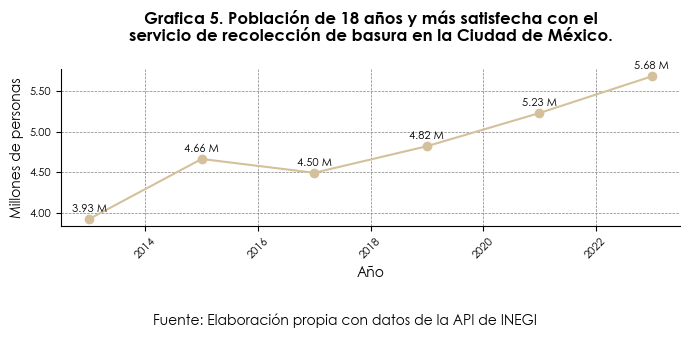

In [233]:

# Crear la gráfica
plt.figure(figsize=(7, 3))
plt.plot(data_resid['Fecha'], data_resid['Cantidad de personas'], marker='o', linestyle='-', color='#d4c19c')
plt.title('Grafica 5. Población de 18 años y más satisfecha con el\nservicio de recolección de basura en la Ciudad de México.', fontsize=12, fontweight='bold', fontname='Century Gothic', ha='center', pad=20)
plt.xlabel('Año', fontsize=10, fontname='Century Gothic', ha='center')
plt.ylabel('Millones de personas', fontsize=10, fontname='Century Gothic', ha='center')

# Agregar cantidad de personas en millones a cada punto
for i, cantidad in enumerate(data_resid['Cantidad de personas']):
    plt.annotate(f'{cantidad:.2f} M', (data_resid['Fecha'][i], cantidad), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, fontname='Century Gothic')

# Agregar fuente debajo del mapa con la fuente 'Century Gothic'
plt.figtext(0.5, -0.1, 'Fuente: Elaboración propia con datos de la API de INEGI', fontsize=10, ha='center', fontname='Century Gothic')

# Formatear los números en el eje Y con comas y dos decimales
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.2f}'))

# Configurar fuente y tamaño de fuente para los números en los ejes X y Y
plt.xticks(fontsize=8, fontname='Century Gothic')
plt.yticks(fontsize=8, fontname='Century Gothic')

# Quitar el marco de la parte superior y derecha
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir líneas de fondo de color gris
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Rotar las etiquetas del eje X y aplicar la misma fuente
plt.xticks(rotation=45)

plt.tight_layout()

# Guardar la imagen
plt.savefig('grafica_5.png', dpi=300)

plt.show()


In [234]:
# Ruta archivos CSV
resid = 'https://raw.githubusercontent.com/Quetzaltlali/PP_LCDN-Residuos_CDMX/main/resi_solidos_cdmx.csv'
resid = pd.read_csv(resid)
resid

,Clave Entidad,Entidad federativa,Clave Municipio,Municipio,Cantidad promedio diaria de residuos sólidos urbanos recolectados,Recolección Casa por casa,Recolección en un punto establecido,Recolección por sistema de contenedores
0,9,Ciudad de México,2,Azcapotzalco,712328,0,712328,0
1,9,Ciudad de México,3,Coyoacán,1100000,440000,660000,0
2,9,Ciudad de México,4,Cuajimalpa de Morelos,610296,0,598090,12206
3,9,Ciudad de México,5,Gustavo A. Madero,3021000,90630,2869950,60420
4,9,Ciudad de México,6,Iztacalco,880000,264000,572000,44000
5,9,Ciudad de México,7,Iztapalapa,1070500,267625,749350,53525
6,9,Ciudad de México,8,La Magdalena Contreras,450000,0,450000,0
7,9,Ciudad de México,9,Milpa Alta,84900,0,84051,849
8,9,Ciudad de México,10,Álvaro Obregón,851000,510600,85100,255300
9,9,Ciudad de México,11,Tláhuac,293000,293000,0,0


### **3) MINERÍA DE DATOS** 
El impacto del uso de contenedores de basura de la CDMX, en la contaminación del aire y agua.


In [235]:
pip install rpy2


In [236]:
# %load_ext rpy2.ipython

In [237]:
# # Datos iniciales
# datos_reales_basura <- matrix(c(
#   2016, 8918653, 12600, 1.41, 10500, 1.18, 2500, 0.28, 10000, 1.12,
#   2017, 8973908, 12900, 1.43, 10800, 1.20, 2600, 0.29, 10200, 1.14,
#   2018, 9035951, 13200, 1.46, 11100, 1.23, 2700, 0.30, 10400, 1.15,
#   2019, 9099589, 13500, 1.48, 11400, 1.25, 2800, 0.31, 10600, 1.16,
#   2020, 9161421, 13200, 1.44, 10800, 1.18, 2700, 0.29, 10100, 1.10,
#   2021, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#   2022, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#   2023, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#   2024, 0, 0, 0, 0, 0, 0, 0, 0, 0), nrow = 9, byrow = TRUE)

# colnames(datos_reales_basura) <- c("Year", "Population", "Ton_per_day", "Ton_per_capita", "Residential", "Res_per_capita", "Commercial", "Com_per_capita", "Industrial", "Ind_per_capita")
# datos_reales_basura <- as.data.frame(datos_reales_basura)

# # Columna de interés
# ton_per_day <- as.numeric(datos_reales_basura$Ton_per_day[1:5])

# # Calcular la media y la desviación estándar
# media <- mean(ton_per_day)
# desviacion_estandar <- sd(ton_per_day)

# media
# desviacion_estandar

# # Configurar la semilla
# set.seed(123)

# # Generar valores simulados
# valores_simulados <- runif(5, min = media - 3 * desviacion_estandar, max = media + 3 * desviacion_estandar)
# valores_simulados

# # Asignar valores simulados
# datos_reales_basura$Ton_per_day[6:9] <- valores_simulados[1:4]
# datos_reales_basura

# # Construir matrices de distancia
# library(stats)

# distancias <- list()
# for (n in 9:1) {
#   distancias[[n]] <- dist(datos_reales_basura$Ton_per_day[1:n])
# }

# distancias

# # Construir jerarquía de clusters
# jerarquia <- hclust(dist(datos_reales_basura$Ton_per_day))
# jerarquia

# # Dendograma
# plot(jerarquia, main = "Dendograma de la jerarquía de clusters", xlab = "Años", ylab = "Distancia", sub = "")

### **4) MERCADOTECNIA DIGITAL** 
Cambio de cultura cívica en la gestión de residuos como herramienta del fomento de prácticas sostenibles.


In [238]:
# Ruta archivos CSV
resid = 'https://raw.githubusercontent.com/Quetzaltlali/PP_LCDN-Residuos_CDMX/main/resi_solidos_cdmx.csv'
resid = pd.read_csv(resid)
resid

,Clave Entidad,Entidad federativa,Clave Municipio,Municipio,Cantidad promedio diaria de residuos sólidos urbanos recolectados,Recolección Casa por casa,Recolección en un punto establecido,Recolección por sistema de contenedores
0,9,Ciudad de México,2,Azcapotzalco,712328,0,712328,0
1,9,Ciudad de México,3,Coyoacán,1100000,440000,660000,0
2,9,Ciudad de México,4,Cuajimalpa de Morelos,610296,0,598090,12206
3,9,Ciudad de México,5,Gustavo A. Madero,3021000,90630,2869950,60420
4,9,Ciudad de México,6,Iztacalco,880000,264000,572000,44000
5,9,Ciudad de México,7,Iztapalapa,1070500,267625,749350,53525
6,9,Ciudad de México,8,La Magdalena Contreras,450000,0,450000,0
7,9,Ciudad de México,9,Milpa Alta,84900,0,84051,849
8,9,Ciudad de México,10,Álvaro Obregón,851000,510600,85100,255300
9,9,Ciudad de México,11,Tláhuac,293000,293000,0,0


In [239]:
#Convertir variable CVE_MUN en nuúmerica
cdmx1['CVE_MUN'] = pd.to_numeric(cdmx1['CVE_MUN'], errors='coerce')

In [240]:
# Agrupar por 'CVE_MUN' y contar el número de 'CVE_AGEB'
conteo_ageb_por_mun = cdmx1.groupby('CVE_MUN')['CVE_AGEB'].count().reset_index()

# Renombrar la columna de conteo para mayor claridad
conteo_ageb_por_mun = conteo_ageb_por_mun.rename(columns={'CVE_AGEB': 'num_ageb'})
conteo_ageb_por_mun

,CVE_MUN,num_ageb
0,2,103
1,3,156
2,4,31
3,5,305
4,6,110
5,7,458
6,8,52
7,9,42
8,10,199
9,11,110


In [241]:
resid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Clave Entidad                                                      17 non-null     int64 
 1   Entidad federativa                                                 17 non-null     object
 2   Clave Municipio                                                    17 non-null     int64 
 3   Municipio                                                          17 non-null     object
 4   Cantidad promedio diaria de residuos sólidos urbanos recolectados  17 non-null     int64 
 5   Recolección Casa por casa                                          17 non-null     int64 
 6   Recolección en un punto establecido                                17 non-null     int64 
 7   Recolección por sistema de contenedore

In [242]:
# Hacer cruce de la tabla conteo_ageb_por_mun la columna CVE_MUN y Clave Municipio para pegar en resid el num_ageb a la tabla resid

# Crear el DataFrame de conteo de AGEB por municipio a partir de 'cdmx1'
conteo_ageb_por_mun = cdmx1.groupby('CVE_MUN')['CVE_AGEB'].count().reset_index()
conteo_ageb_por_mun = conteo_ageb_por_mun.rename(columns={'CVE_AGEB': 'num_ageb'})

# Asegurarse de que las columnas sean del mismo tipo
resid['Clave Municipio'] = pd.to_numeric(resid['Clave Municipio'], errors='coerce')
conteo_ageb_por_mun['CVE_MUN'] = pd.to_numeric(conteo_ageb_por_mun['CVE_MUN'], errors='coerce')

# Renombrar la columna 'Clave Municipio' a 'CVE_MUN' en resid para hacer el cruce
resid = resid.rename(columns={'Clave Municipio': 'CVE_MUN'})

# Hacer el cruce con resid para pegar num_ageb
resid = resid.merge(conteo_ageb_por_mun, on='CVE_MUN', how='left')

# Renombrar la columna 'CVE_MUN' de nuevo a 'Clave Municipio' si es necesario
resid = resid.rename(columns={'CVE_MUN': 'Clave Municipio'})

In [243]:
# Crear la nueva columna como la división de 'Cantidad promedio diaria de residuos sólidos urbanos recolectados' entre 'num_ageb'
resid['Demanda de contenedores por AGEB'] = (resid['Cantidad promedio diaria de residuos sólidos urbanos recolectados'] / resid['num_ageb']).round(2)
resid

,Clave Entidad,Entidad federativa,Clave Municipio,Municipio,Cantidad promedio diaria de residuos sólidos urbanos recolectados,Recolección Casa por casa,Recolección en un punto establecido,Recolección por sistema de contenedores,num_ageb,Demanda de contenedores por AGEB
0,9,Ciudad de México,2,Azcapotzalco,712328,0,712328,0,103.0,6915.81
1,9,Ciudad de México,3,Coyoacán,1100000,440000,660000,0,156.0,7051.28
2,9,Ciudad de México,4,Cuajimalpa de Morelos,610296,0,598090,12206,31.0,19686.97
3,9,Ciudad de México,5,Gustavo A. Madero,3021000,90630,2869950,60420,305.0,9904.92
4,9,Ciudad de México,6,Iztacalco,880000,264000,572000,44000,110.0,8000.00
5,9,Ciudad de México,7,Iztapalapa,1070500,267625,749350,53525,458.0,2337.34
6,9,Ciudad de México,8,La Magdalena Contreras,450000,0,450000,0,52.0,8653.85
7,9,Ciudad de México,9,Milpa Alta,84900,0,84051,849,42.0,2021.43
8,9,Ciudad de México,10,Álvaro Obregón,851000,510600,85100,255300,199.0,4276.38
9,9,Ciudad de México,11,Tláhuac,293000,293000,0,0,110.0,2663.64
